# Returns Distribution and Investment Risk analysis for Sony (6758.T)

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
% matplotlib inline

UsageError: Line magic function `%` not found.


In [125]:
# Load one year worth of Sony (6758.T) stock data (open/close/traded)
sony = pd.read_csv('data/sony-july-2018-july-2019.csv')
sony['DATE'] = pd.to_datetime(sony['DATE'], format='%Y-%m-%d')
sony.describe()

,OPEN_PRICE,DAILY_HIGH,DAILY_LOW,CLOSE_PRICE,TRADED_VOLUME,ADJUSTED_CLOSE_PRICE
count,260.000000,260.000000,260.000000,260.000000,2.600000e+02,260.000000
mean,5658.200000,5714.796154,5597.342308,5655.657692,7.158330e+06,5655.657692
std,495.892548,499.951110,490.490931,494.526842,3.377836e+06,494.526842
min,4550.000000,4638.000000,4507.000000,4630.000000,2.799300e+06,4630.000000
25%,5299.750000,5367.250000,5277.750000,5323.250000,5.026275e+06,5323.250000
50%,5622.500000,5690.000000,5559.500000,5623.500000,6.554000e+06,5623.500000
75%,6008.250000,6042.000000,5955.500000,5985.750000,7.897525e+06,5985.750000
max,6930.000000,6973.000000,6845.000000,6966.000000,2.728210e+07,6966.000000


In [126]:
sony.head()

,DATE,OPEN_PRICE,DAILY_HIGH,DAILY_LOW,CLOSE_PRICE,TRADED_VOLUME,ADJUSTED_CLOSE_PRICE
0,2018-06-12,5572,5610,5441,5478,6566600,5478
1,2018-06-13,5496,5507,5449,5501,4299400,5501
2,2018-06-14,5465,5490,5387,5387,4068300,5387
3,2018-06-15,5450,5480,5412,5445,5353300,5445
4,2018-06-18,5390,5398,5338,5359,3806200,5359


In [127]:
# Add Moving Average over 15 days
sony['MA15'] = sony['CLOSE_PRICE'].rolling(15).mean()

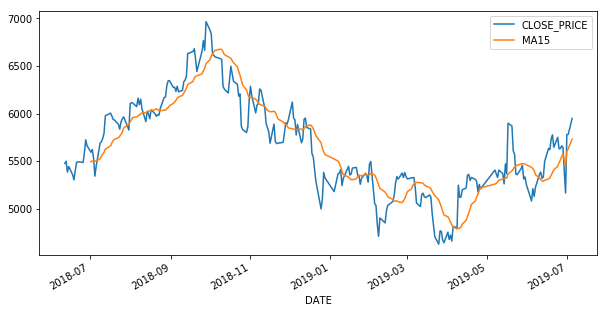

In [128]:
sony.plot(x='DATE', y=['CLOSE_PRICE', 'MA15'], figsize=(10,5))

## Calculate log returns

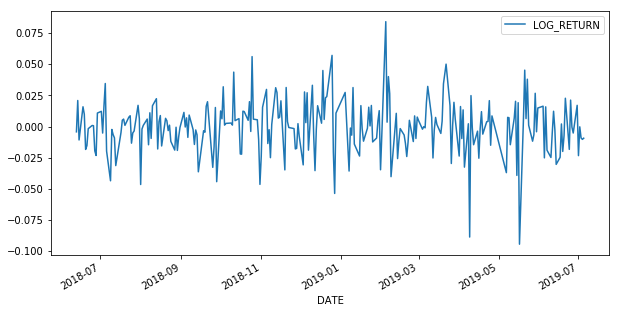

In [129]:
sony['LOG_RETURN'] = np.log(sony['CLOSE_PRICE'].shift(1)) - np.log(sony['CLOSE_PRICE'])
sony.plot(x='DATE', y='LOG_RETURN', figsize=(10,5))

In [130]:
# Calculate properties of log-returns distribution
mu = sony['LOG_RETURN'].mean()
sigma = sony['LOG_RETURN'].std(ddof=1)
print(f'Mean: {mu:.5f}, Standard Deviation: {sigma:.5f}')

Mean: -0.00032, Standard Deviation: 0.02128


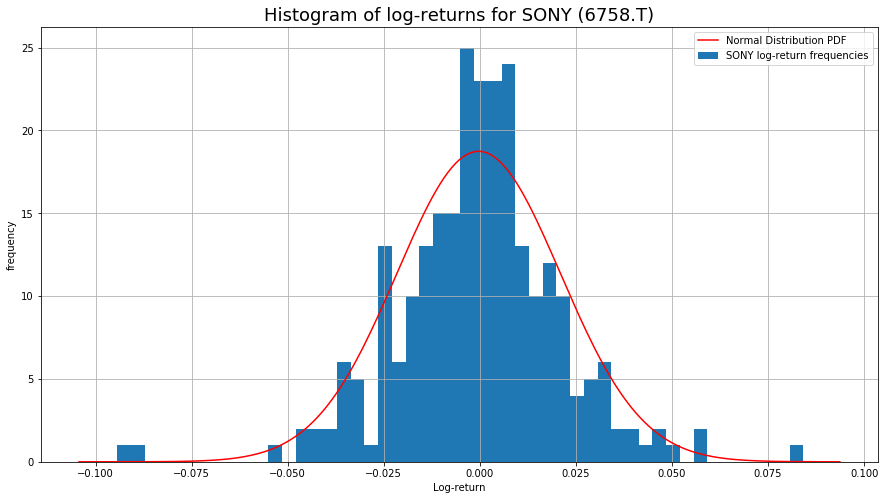

In [131]:
# Plot log-returns distribution along with the theoretical normal distribution with same Mean and Standard Deviation
pdf = pd.DataFrame()
pdf['x'] = np.arange(sony['LOG_RETURN'].min()-0.01, sony['LOG_RETURN'].max()+0.01, 0.001)
pdf['pdf'] = norm.pdf(pdf['x'], mu, sigma)

sony['LOG_RETURN'].hist(bins=50, figsize=(15, 8))
plt.plot(pdf['x'], pdf['pdf'], color='red')
plt.title(f'Histogram of log-returns for SONY (6758.T)', fontsize=18)
plt.xlabel('Log-return')
plt.ylabel('frequency')
plt.legend(['Normal Distribution PDF', 'SONY log-return frequencies'])
plt.show()

## Probability of dropping 2% or more in a single day

In [132]:
prob_drop_pct = 100*norm.cdf(-0.02, mu, sigma)
print(f'Probability of dropping 2% or more in a single day: {prob_drop_pct:.3f}%')

Probability of dropping 2% or more in a single day: 17.756%


## Probability of dropping 20% or more in over a year

In [133]:
days_in_a_year = 250
mu_year = days_in_a_year * mu
sigma_year = (days_in_a_year**0.5) * sigma
prob_drop_five_plus_pct = 100*norm.cdf(-0.2, mu_year, sigma_year)
print(f'Probability of dropping 20% or more in over a year: {prob_drop_five_plus_pct:.3f}%')

Probability of dropping 20% or more in over a year: 36.046%


## Value at risk

Value at risk (VaR) is a measure of the risk of loss for investments. It estimates how much a set of investments might lose (with a given probability), given normal market conditions, in a set time period such as a day. 

In [134]:
# Value at risk(VaR)
confidence_level = 0.99
worst_quantile = 1. - confidence_level

var_day = norm.ppf(worst_quantile, mu, sigma)
print(f'The maximum daily loss pecentage we can expect with the confidence level {100*confidence_level}% is {100*var_day:.2f}%')
print(f'In the worst {100*worst_quantile:.2f} of cases we can expect to lose the maximum of {100*var_day:.2f}% on our investment')

The maximum daily loss pecentage we can expect with the confidence level 99.0% is -4.98%
In the worst 1.00 of cases we can expect to lose the maximum of -4.98% on our investment
